In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
accuracy_resnet101_scratch = [0.865, 0.842,0.836, 0.838]
recall_resnet101_scratch = [0.032,0.035,0.04,0.042]
accuracy_resnet50_frozen = [0.873,0.8227525467498783,0.8460726333486642, 0.8633879764570883, 0.8631379945876408,0.861035420667506,0.8566660104915257,0.8514697277565316,0.8540980413600116, 0.858]
recall_resnet50_frozen = [0.036,0.04355768162891623,0.04779638095332421,0.051712131757777294,0.0533874272050433,0.05185342173525756,0.05139927537907099,0.05184332959400897,0.05208554098397514, 0.053]
accuracy_resnet18_ucf_frozen = [0.8548654903524892,0.8583679091054829,0.8478313524404377,0.8341797287829991,0.843023253998658,0.8246869391218986,0.8535614786041356,0.8562789742868797,0.8594971458704899,0.8553631738695879]
recall_resnet18_ucf_frozen = [0.030387437299505743,0.03648309061365435,0.041650266932932646,0.045707307714865995,0.046867903958453895,0.04513205566369634,0.05072310191541543,0.050067112734257055,0.04776610452957844,0.04779638095332421]
accuracy_resnet18_ucf = [0.8378550882928341,0.8562552926962572,0.868011665367011,0.8487352846262577,0.8569521671702955,0.8377018225252636,0.8328145824081491,0.847045706026654,0.8365281050257849]
recall_resnet18_ucf = [0.031618678531833776,0.035736272161258666,0.04151906909670097,0.04029792000562153,0.04536417491241392,0.04812942161452769,0.04539445133615969,0.04526325349992802,0.0468578118172053]
accuracy_resnet18 = [0.8519488999281071,0.8754419339803047,0.8739946359395695,0.8541754962819511,0.8564444425412346]
recall_resnet18 = [0.03081130723194654,0.03710880337106696,0.041408055542966477,0.04761472241084958,0.04541463561865687]

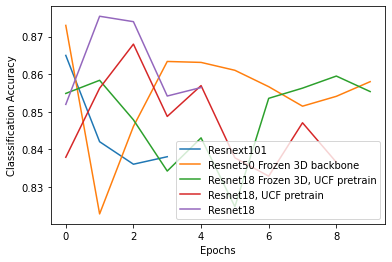

In [4]:
plt.plot(accuracy_resnet101_scratch, label='Resnext101')
plt.plot(accuracy_resnet50_frozen, label='Resnet50 Frozen 3D backbone')
plt.plot(accuracy_resnet18_ucf_frozen, label='Resnet18 Frozen 3D, UCF pretrain')
plt.plot(accuracy_resnet18_ucf, label='Resnet18, UCF pretrain')
plt.plot(accuracy_resnet18, label='Resnet18')
plt.xlabel("Epochs")
plt.ylabel("Classsification Accuracy")
plt.legend()
plt.show()

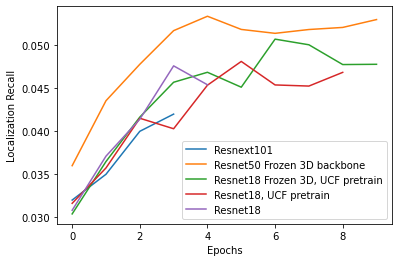

In [5]:
plt.plot(recall_resnet101_scratch, label='Resnext101')
plt.plot(recall_resnet50_frozen, label='Resnet50 Frozen 3D backbone')
plt.plot(recall_resnet18_ucf_frozen, label='Resnet18 Frozen 3D, UCF pretrain')
plt.plot(recall_resnet18_ucf, label='Resnet18, UCF pretrain')
plt.plot(recall_resnet18, label='Resnet18')
plt.xlabel("Epochs")
plt.ylabel("Localization Recall")
plt.legend()

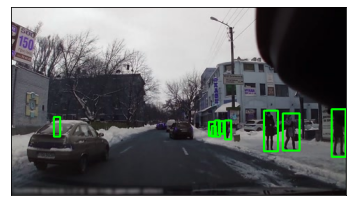

True

In [110]:
im = cv2.imread('datasets/jaad/rgb-images/images/video_0186/00080.jpg')
f = open('datasets/jaad/labels/images/video_0186/000080.txt','r')
labels = []
for lines in f:
    labels.append(lines.split())
labels = [list(map(float, labels[i])) for i in range(len(labels))] 

for l in labels:
    if(l[0] == 1):
        color = (0,255,0)
    else:
        color = (255,0,0)
    thickness = 2
    startpt = (int(l[2]),int(l[1]))
    endpt = (int(l[4]),int(l[3]))
    im = cv2.rectangle(im, startpt, endpt, color, thickness)

plt.imshow(im)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()
cv2.imwrite('groundtruth1.jpg',im)

In [105]:
clipno = 
im = cv2.imread('datasets/jaad/rgb-images/images/video_0296/00040.jpg')
f = open('jaad_detections/detections_10/images_video_0296_00040.txt','r')
labels = []
for lines in f:
    labels.append(lines.split())
labels = [list(map(float, labels[i])) for i in range(len(labels))] 

labels.sort(key = lambda x:x[1], reverse=True)

i=0
for l in labels:
    if(l[1] > 0.00001):
        if(l[0] == 1):
            color = (0,255,0)
        else:
            color = (255,0,0)
        thickness = 2
        startpt = (int(l[2]),int(l[1]))
        endpt = (int(l[4]),int(l[3]))
        im = cv2.rectangle(im, startpt, endpt, color, thickness)
        i = i+1
        if(i > 0):
            break

plt.imshow(im)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()
cv2.imwrite('detected3.jpg',im)

FileNotFoundError: [Errno 2] No such file or directory: 'jaad_detections/detections_10/images_video_0296_00040.txt'